<a href="https://colab.research.google.com/github/sandeepkattupalli/Data_analysis/blob/main/assignnment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
 file_loc=r"/hotel_reviews (2).json"
 data=pd.read_json(file_loc)

In [3]:
file_loc_csv = r"/content/hotel_reviews.csv"

# Convert the DataFrame to a CSV file
data.to_csv(file_loc_csv, index=False)
print(f"Conversion from JSON to CSV completed. CSV file saved at {file_loc_csv}")

Conversion from JSON to CSV completed. CSV file saved at /content/hotel_reviews.csv


In [4]:
data1=pd.read_csv(r"/content/hotel_reviews.csv")


In [5]:
data1

,review,sentiment
0,The walls were thin and could hear noise from ...,positive
1,The walls were thin and could hear noise from ...,negative
2,The food was overpriced and not very tasty. 😐,neutral
3,"An average stay, nothing special but no major ...",positive
4,Loved the spa and pool area! A truly relaxing ...,negative
...,...,...
3995,"An average stay, nothing special but no major ...",neutral
3996,Very clean rooms and excellent location. Highl...,positive
3997,"The hotel was okay, not great but not terrible...",negative
3998,Unfriendly staff and the breakfast was disappo...,neutral


In [6]:
df=data1.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     4000 non-null   object
 1   sentiment  4000 non-null   object
dtypes: object(2)
memory usage: 62.6+ KB


In [8]:
df.head(5)

,review,sentiment
0,The walls were thin and could hear noise from ...,positive
1,The walls were thin and could hear noise from ...,negative
2,The food was overpriced and not very tasty. 😐,neutral
3,"An average stay, nothing special but no major ...",positive
4,Loved the spa and pool area! A truly relaxing ...,negative


In [9]:
df.describe()

,review,sentiment
count,4000,4000
unique,33,3
top,The food was overpriced and not very tasty. 😐,positive
freq,148,1334


In [10]:
df['sentiment'].describe()

count         4000
unique           3
top       positive
freq          1334
Name: sentiment, dtype: object

In [11]:
feature_var=df[["review"]]

In [12]:
class_var=df[["sentiment"]]

In [13]:
" ".join(feature_var["review"]).islower()

False

In [14]:
feature_var["review"].apply(lambda x: True if re.search("<.+?>", x) else False)

0       False
1       False
2       False
3       False
4       False
        ...  
3995    False
3996    False
3997    False
3998    False
3999    False
Name: review, Length: 4000, dtype: bool

In [15]:
feature_var["review"].apply(lambda x:True if re.search("http[s]?://.+? +",x) else False).sum()

0

In [16]:
feature_var['review'].apply(lambda x:True if re.search("[]()*\-:;\".,@#$%^&0-9]",x) else False).sum()

4000

In [17]:
pip install emoji

In [18]:
import emoji

# Assuming 'review' is a column in your DataFrame
feature_var['review'].apply(lambda x: True if emoji.emoji_count(x) > 0 else False).sum()

4000

In [19]:
import emoji

# Assuming 'review' is a column in your DataFrame
for index, row in feature_var.iterrows():
    if emoji.emoji_count(row['review']) > 0:
        print(f"Row {index}: {row['review']}")


Row 0: The walls were thin and could hear noise from other rooms. Not a good stay. 😊
Row 1: The walls were thin and could hear noise from other rooms. Not a good stay. 😞
Row 2: The food was overpriced and not very tasty. 😐
Row 3: An average stay, nothing special but no major problems. 😊
Row 4: Loved the spa and pool area! A truly relaxing experience. 😞
Row 5: Room was small and the air conditioning was loud. 😐
Row 6: An average stay, nothing special but no major problems. 😊
Row 7: The food was overpriced and not very tasty. 😞
Row 8: Fantastic location, friendly staff, and cozy rooms. 😐
Row 9: Very clean rooms and excellent location. Highly recommend! 😊
Row 10: Loved the spa and pool area! A truly relaxing experience. 😞
Row 11: Loved the spa and pool area! A truly relaxing experience. 😐
Row 12: Unfriendly staff and the breakfast was disappointing. 😊
Row 13: Loved the spa and pool area! A truly relaxing experience. 😞
Row 14: Very clean rooms and excellent location. Highly recommend! 😐
Ro

In [20]:
def edat(data,name):
    case=" ".join(data[name]).islower()
    html_=data[name].apply(lambda x:True if re.search("<.+?>",x) else False).sum()
    url_=data[name].apply(lambda x:True if re.search("http[s]?://.+? +",x) else False).sum()
    unwanted_=data[name].apply(lambda x:True if re.search("[]()*\-.,@#$%^&0-9]",x) else False).sum()
    if case==False:
        print("not in lower case")
    else:
        print("lover case")
    if html_>0:
        print("have html tags")
    else:
        print("not have html")
    if url_>0:
        print("you are having urls")
    if unwanted_>0:
        print("you are having unwanted characters")

In [21]:
edat(feature_var,"review")

not in lower case
not have html
you are having unwanted characters


In [22]:
pip install autocorrect

In [23]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [24]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [26]:
feature_var["review"]




0       The walls were thin and could hear noise from ...
1       The walls were thin and could hear noise from ...
2           The food was overpriced and not very tasty. 😐
3       An average stay, nothing special but no major ...
4       Loved the spa and pool area! A truly relaxing ...
                              ...                        
3995    An average stay, nothing special but no major ...
3996    Very clean rooms and excellent location. Highl...
3997    The hotel was okay, not great but not terrible...
3998    Unfriendly staff and the breakfast was disappo...
3999    Very clean rooms and excellent location. Highl...
Name: review, Length: 4000, dtype: object

In [27]:
def textpp(x,correct,emojii):
    from textblob import TextBlob
    x = x.lower()
    if emojii == True:
        x=emoji.demojize(x)
    x = re.sub("[]?:()*-.,@/_#$%^&0-9]"," ",x)
    if correct == 't':
        x = TextBlob(x).correct().string
    else:
        x = (x)
    return x


In [28]:
# feature_var["review"] = feature_var["review"].apply(lambda x: textpp(x, correct="t", emojii=True))


In [29]:
feature_var["review"] = feature_var["review"].apply(textpp,args=['t',True])

<ipython-input-29-2c4a945821c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_var["review"] = feature_var["review"].apply(textpp,args=['t',True])


In [32]:

feature_var['review']

0       the walls were thin and could hear noise from ...
1       the walls were thin and could hear noise from ...
2       the food was overpriced and not very taste   n...
3       an average stay  nothing special but no major ...
4       loved the sea and pool area! a truly relaxing ...
                              ...                        
3995    an average stay  nothing special but no major ...
3996    very clean rooms and excellent location  highl...
3997    the hotel was okay  not great but not terrible...
3998    unfriendly staff and the breakfast was disappo...
3999    very clean rooms and excellent location  highl...
Name: review, Length: 4000, dtype: object

In [35]:
"".join(feature_var["review"])

'the walls were thin and could hear noise from other rooms  not a good stay   smiling face with smiling eyes the walls were thin and could hear noise from other rooms  not a good stay   disappointed face the food was overpriced and not very taste   neutral face an average stay  nothing special but no major problems   smiling face with smiling eyes loved the sea and pool area! a truly relaxing experience   disappointed face room was small and the air conditioning was loud   neutral face an average stay  nothing special but no major problems   smiling face with smiling eyes the food was overpriced and not very taste   disappointed face fantastic location  friendly staff  and copy rooms   neutral face very clean rooms and excellent location  highly recommend!  smiling face with smiling eyes loved the sea and pool area! a truly relaxing experience   disappointed face loved the sea and pool area! a truly relaxing experience   neutral face unfriendly staff and the breakfast was disappointing

In [33]:
edat(feature_var,'review')

lover case
not have html


In [34]:
from nltk.tokenize import word_tokenize,sent_tokenize

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,LancasterStemmer,SnowballStemmer,WordNetLemmatizer

In [36]:
def advpp(x,stem):
    ps = PorterStemmer()
    ls = LancasterStemmer()
    ss = SnowballStemmer(language = 'english')
    lw = WordNetLemmatizer()
    stp = stopwords.words('english')
    l =[]
    for word in word_tokenize(x):
        if word in stp:
            pass
        else:
            if stem == 'p':
                l.append(ps.stem(word))
            elif stem == 'l':
                l.append(ls.stem(word))
            elif stem == 's':
                l.append(ss.stem(word))
            elif stem == 'lemma':
                l.append(lw.lemmatize(word,pos = 'v'))
            else:
                l.append(word)
    return " ".join(l)

In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
feature_var['review'] = feature_var['review'].apply(advpp,args=['p'])

<ipython-input-39-68c979ffc3b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_var['review'] = feature_var['review'].apply(advpp,args=['p'])


In [40]:
feature_var['review']

0       wall thin could hear nois room good stay smile...
1       wall thin could hear nois room good stay disap...
2                           food overpr tast neutral face
3       averag stay noth special major problem smile f...
4       love sea pool area ! truli relax experi disapp...
                              ...                        
3995    averag stay noth special major problem neutral...
3996    clean room excel locat highli recommend ! smil...
3997      hotel okay great terribl either disappoint face
3998    unfriendli staff breakfast disappoint neutral ...
3999    clean room excel locat highli recommend ! smil...
Name: review, Length: 4000, dtype: object

In [42]:
duplicates=df.duplicated().sum()
duplicates

3967

In [43]:
df['sentiment'].value_counts()

positive    1334
negative    1333
neutral     1333
Name: sentiment, dtype: int64

In [44]:
feature_var['review'].value_counts()

food overpr tast neutral face                                     148
hotel okay great terribl either smile face smile eye              140
clean room excel locat highli recommend ! smile face smile eye    132
unfriendli staff breakfast disappoint neutral face                132
love sea pool area ! truli relax experi disappoint face           131
hotel wonder excel servic smile face smile eye                    131
wall thin could hear nois room good stay neutral face             128
fantast locat friendli staff copi room disappoint face            128
hotel wonder excel servic neutral face                            127
room small air condit loud disappoint face                        126
averag stay noth special major problem smile face smile eye       125
hotel okay great terribl either disappoint face                   124
hotel wonder excel servic disappoint face                         123
hotel okay great terribl either neutral face                      123
love sea pool area !

In [45]:
d1 = pd.concat([feature_var,class_var],axis = 1)

In [46]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     4000 non-null   object
 1   sentiment  4000 non-null   object
dtypes: object(2)
memory usage: 62.6+ KB


In [47]:
d1.isnull().sum()

review       0
sentiment    0
dtype: int64

In [48]:
d1.describe()

,review,sentiment
count,4000,4000
unique,33,3
top,food overpr tast neutral face,positive
freq,148,1334


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

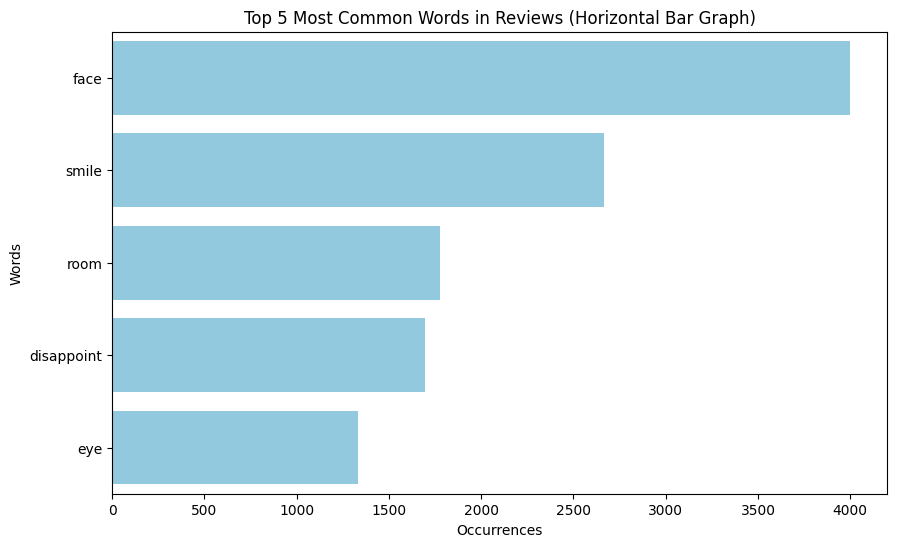

In [50]:
reviews = feature_var['review'].str.lower()
reviews_text = ' '.join(reviews)

tokens = word_tokenize(reviews_text)

word_counts = {}
for word in tokens:
    word_counts[word] = word_counts.get(word, 0) + 1


top_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:5]

words, counts = zip(*top_words)
counts = list(counts)
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=list(words), color='skyblue')
plt.xlabel('Occurrences')
plt.ylabel('Words')
plt.title('Top 5 Most Common Words in Reviews (Horizontal Bar Graph)')
plt.show()


In [51]:
reviews = feature_var['review'].str.lower()
reviews_text = ' '.join(reviews)

tokens = word_tokenize(reviews_text)

word_counts = {}
for word in tokens:
    word_counts[word] = word_counts.get(word, 0) + 1


most_repeated = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:6]

words, counts = zip(*most_repeated)
counts = list(counts)
print(most_repeated)

[('face', 4000), ('smile', 2668), ('room', 1775), ('disappoint', 1693), ('eye', 1334), ('neutral', 1333)]


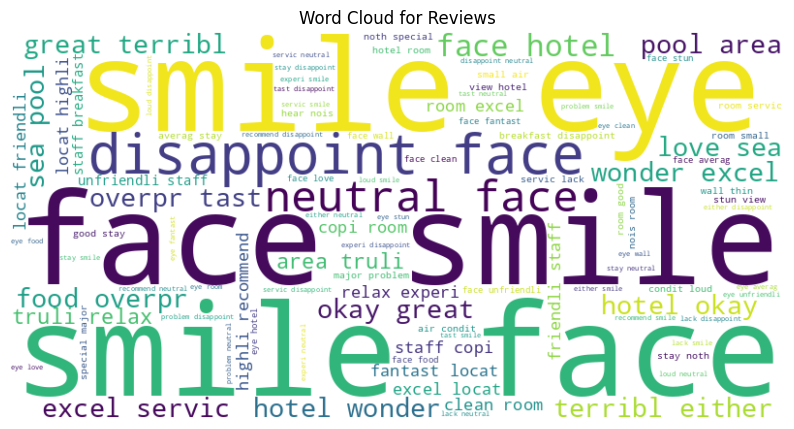

In [52]:
from wordcloud import WordCloud
reviews = feature_var['review'].str.lower().str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Reviews')
plt.show()


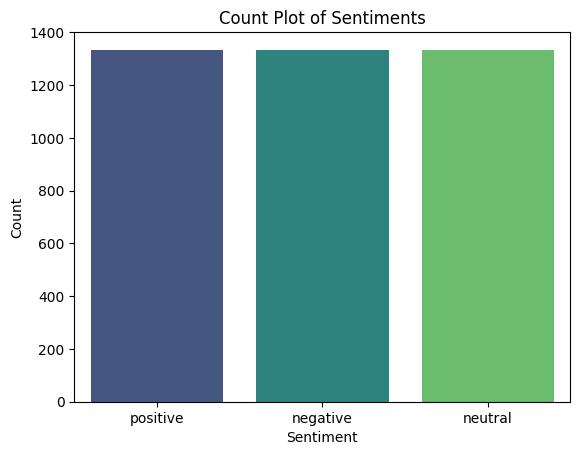

<Figure size 600x600 with 0 Axes>

In [58]:

sns.countplot(x=d1["sentiment"], data=df, palette='viridis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Count Plot of Sentiments')
plt.figure(figsize=(6, 6))
plt.show()


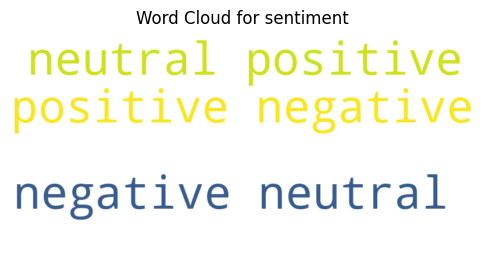

In [56]:
reviews =class_lab=d1["sentiment"].str.lower().str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for sentiment')
plt.show()

In [59]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [60]:
bag=CountVectorizer()    #bag of words

In [61]:
bag.fit_transform(d1["review"])

<4000x53 sparse matrix of type '<class 'numpy.int64'>'
	with 30923 stored elements in Compressed Sparse Row format>

In [65]:
d2=bag.fit_transform(d1["review"]).toarray()

In [66]:
d2

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [67]:
bag.vocabulary_

{'wall': 51,
 'thin': 47,
 'could': 7,
 'hear': 19,
 'nois': 28,
 'room': 36,
 'good': 17,
 'stay': 43,
 'smile': 40,
 'face': 13,
 'eye': 12,
 'disappoint': 8,
 'food': 15,
 'overpr': 31,
 'tast': 45,
 'neutral': 27,
 'averag': 2,
 'noth': 29,
 'special': 41,
 'major': 26,
 'problem': 33,
 'love': 25,
 'sea': 37,
 'pool': 32,
 'area': 1,
 'truli': 48,
 'relax': 35,
 'experi': 11,
 'small': 39,
 'air': 0,
 'condit': 5,
 'loud': 24,
 'fantast': 14,
 'locat': 23,
 'friendli': 16,
 'staff': 42,
 'copi': 6,
 'clean': 4,
 'excel': 10,
 'highli': 20,
 'recommend': 34,
 'unfriendli': 49,
 'breakfast': 3,
 'hotel': 21,
 'okay': 30,
 'great': 18,
 'terribl': 46,
 'either': 9,
 'wonder': 52,
 'servic': 38,
 'stun': 44,
 'view': 50,
 'lack': 22}

In [68]:
tfidf=TfidfVectorizer(ngram_range=(1,1))

In [70]:
tfidf.fit_transform(d1["review"])

<4000x53 sparse matrix of type '<class 'numpy.float64'>'
	with 30923 stored elements in Compressed Sparse Row format>

In [71]:
d3=tfidf.fit_transform(d1["review"]).toarray()

In [72]:
d3

array([[0.        , 0.        , 0.        , ..., 0.        , 0.33639317,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.36996077,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [73]:
tfidf.vocabulary_

{'wall': 51,
 'thin': 47,
 'could': 7,
 'hear': 19,
 'nois': 28,
 'room': 36,
 'good': 17,
 'stay': 43,
 'smile': 40,
 'face': 13,
 'eye': 12,
 'disappoint': 8,
 'food': 15,
 'overpr': 31,
 'tast': 45,
 'neutral': 27,
 'averag': 2,
 'noth': 29,
 'special': 41,
 'major': 26,
 'problem': 33,
 'love': 25,
 'sea': 37,
 'pool': 32,
 'area': 1,
 'truli': 48,
 'relax': 35,
 'experi': 11,
 'small': 39,
 'air': 0,
 'condit': 5,
 'loud': 24,
 'fantast': 14,
 'locat': 23,
 'friendli': 16,
 'staff': 42,
 'copi': 6,
 'clean': 4,
 'excel': 10,
 'highli': 20,
 'recommend': 34,
 'unfriendli': 49,
 'breakfast': 3,
 'hotel': 21,
 'okay': 30,
 'great': 18,
 'terribl': 46,
 'either': 9,
 'wonder': 52,
 'servic': 38,
 'stun': 44,
 'view': 50,
 'lack': 22}

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
